# **Video Game Sales Prediction**

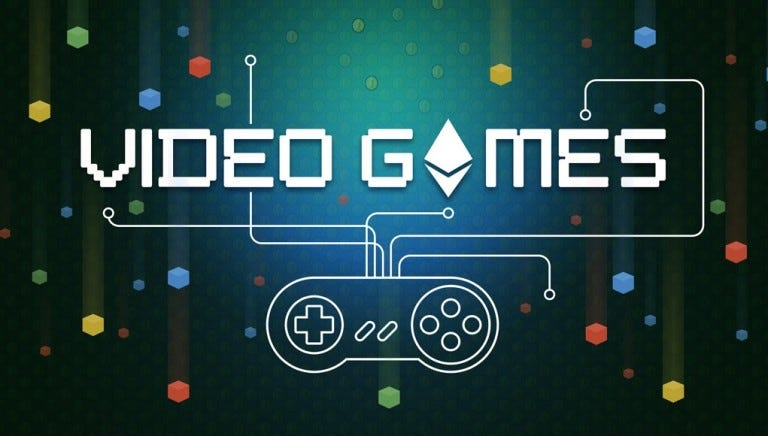

**Name : Nikitha.C.A**

---


**Organization : Entri Elevate**

---


**Date : 25-09-2024**

**Objective:**

> To predict the global sales of the video games using machine learning techniques



**Data Description:**

> -Source : https://data.world/sumitrock/videogame<br><br>
> -<u>Features</u>:


1.   Name          : Name of the game
2.   Platform      : Platform on which the game is available (i.e. PC,PS4, etc.)
3.   Year_of_Release : Year in which the game is released
4.   Genre         : Type of the game(Sports,Racing, etc.)
5.   Publisher     : Company that published the game
6.   NA_Sales      : North America Sales
7.   EU_Sales      : Europe Sales
8.   JP_Sales      :Japan Sales
9.   Other_Sales   :Sales in other regions
10.  Global Sales  : Total worldwide sales
11.  Critic_Score  :Score from professional reviewers and critics
12.  Critic_Count  :Count of individual reviewers
13.  User_Score    :Rating of common users
14.  User_Count    :Number of individual who contribute review
15.  Developer     :Specifies the developer of the game
16.  Rating        :Rating of the game(E,M,e.t.c.)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('Downloads/Video_Games.csv')

In [3]:
dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.shape

(16719, 16)

In [6]:
dataset.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [7]:
dataset.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [9]:
dataset.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [10]:
dataset.describe(include='object').T

,count,unique,top,freq
Name,16717,11562,Need for Speed: Most Wanted,12
Platform,16719,31,PS2,2161
Genre,16717,12,Action,3370
Publisher,16665,581,Electronic Arts,1356
User_Score,10015,96,tbd,2425
Developer,10096,1696,Ubisoft,204
Rating,9950,8,E,3991


In [11]:
dataset['Global_Sales'].unique()

array([8.253e+01, 4.024e+01, 3.552e+01, 3.277e+01, 3.137e+01, 3.026e+01,
       2.980e+01, 2.892e+01, 2.832e+01, 2.831e+01, 2.467e+01, 2.321e+01,
       2.310e+01, 2.270e+01, 2.181e+01, 2.179e+01, 2.104e+01, 2.081e+01,
       2.061e+01, 2.015e+01, 1.825e+01, 1.814e+01, 1.728e+01, 1.627e+01,
       1.615e+01, 1.585e+01, 1.529e+01, 1.514e+01, 1.498e+01, 1.473e+01,
       1.464e+01, 1.463e+01, 1.461e+01, 1.460e+01, 1.379e+01, 1.367e+01,
       1.347e+01, 1.332e+01, 1.310e+01, 1.284e+01, 1.266e+01, 1.263e+01,
       1.261e+01, 1.213e+01, 1.212e+01, 1.189e+01, 1.177e+01, 1.168e+01,
       1.166e+01, 1.135e+01, 1.118e+01, 1.101e+01, 1.095e+01, 1.081e+01,
       1.070e+01, 1.060e+01, 1.055e+01, 1.050e+01, 1.049e+01, 1.030e+01,
       1.025e+01, 1.012e+01, 9.900e+00, 9.870e+00, 9.860e+00, 9.720e+00,
       9.710e+00, 9.490e+00, 9.440e+00, 9.360e+00, 9.310e+00, 9.300e+00,
       9.180e+00, 9.160e+00, 8.910e+00, 8.790e+00, 8.760e+00, 8.570e+00,
       8.490e+00, 8.380e+00, 8.270e+00, 8.160e+00, 

In [12]:
dataset['Platform'].value_counts()

Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [13]:
total_sales_per_platform = dataset.groupby('Platform')['Global_Sales'].sum()
print(total_sales_per_platform)

Platform
2600      97.08
3DO        0.10
3DS      259.09
DC        15.97
DS       807.10
GB       255.45
GBA      318.50
GC       199.36
GEN       30.78
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       260.30
PCFX       0.03
PS       730.68
PS2     1255.64
PS3      939.43
PS4      314.23
PSP      294.30
PSV       54.12
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      908.13
WiiU      82.16
X360     971.63
XB       258.26
XOne     159.44
Name: Global_Sales, dtype: float64


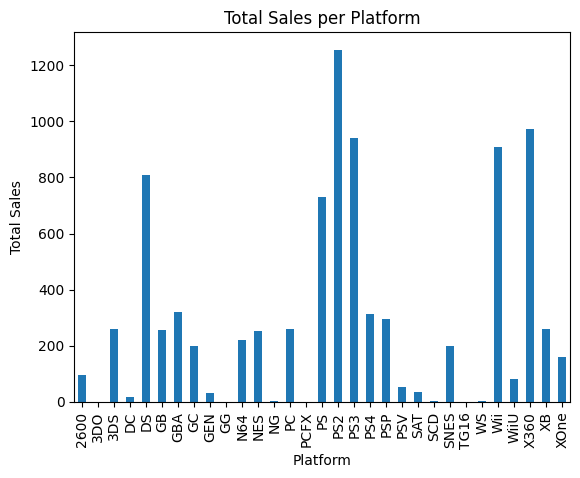

In [14]:
total_sales_per_platform.plot(kind='bar')
plt.title('Total Sales per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

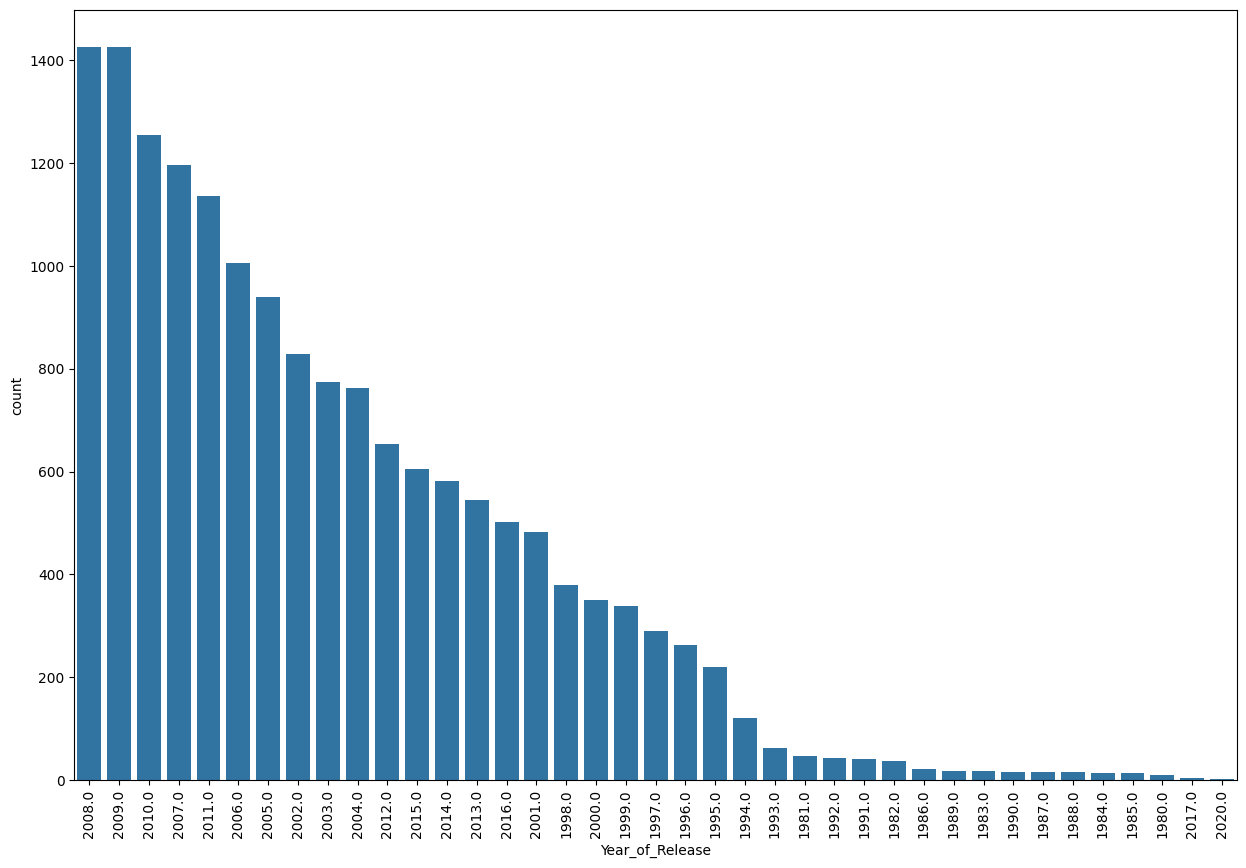

In [15]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year_of_Release", data=dataset, order = dataset.groupby(by=['Year_of_Release'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

In [16]:
total_sales_per_year=dataset.groupby('Year_of_Release')['Global_Sales'].sum()
print(total_sales_per_year)

Year_of_Release
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.17
1993.0     48.40
1994.0     79.18
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.45
1999.0    251.25
2000.0    201.58
2001.0    331.47
2002.0    395.51
2003.0    357.80
2004.0    419.05
2005.0    458.31
2006.0    518.22
2007.0    605.37
2008.0    671.79
2009.0    658.88
2010.0    590.59
2011.0    507.79
2012.0    355.84
2013.0    361.24
2014.0    331.51
2015.0    268.05
2016.0    130.10
2017.0      0.06
2020.0      0.29
Name: Global_Sales, dtype: float64


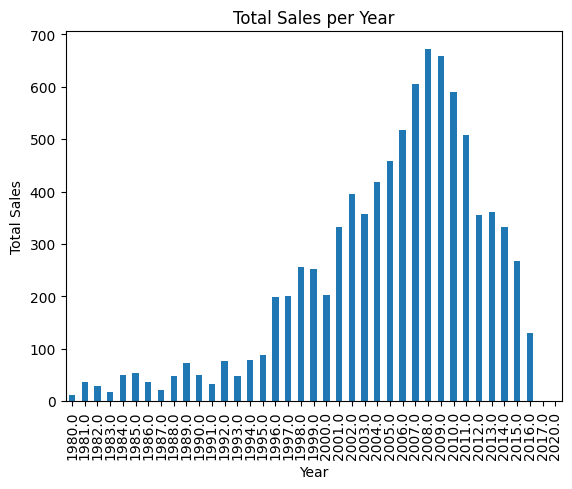

In [17]:
total_sales_per_year.plot(kind='bar')
plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

In [18]:
dataset['Genre'].value_counts()

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

In [19]:
total_sales_per_genre=dataset.groupby(by=['Genre'])['Global_Sales'].sum()
print(total_sales_per_genre)

Genre
Action          1745.27
Adventure        237.69
Fighting         447.48
Misc             803.18
Platform         828.08
Puzzle           243.02
Racing           728.90
Role-Playing     934.40
Shooter         1052.94
Simulation       390.42
Sports          1332.00
Strategy         174.50
Name: Global_Sales, dtype: float64


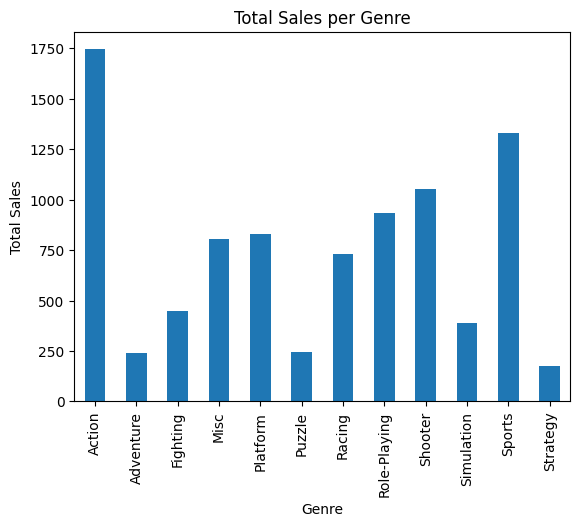

In [20]:
total_sales_per_genre.plot(kind='bar')
plt.title('Total Sales per Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show()

In [21]:
total_sale_by_publisher = dataset.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
print(total_sale_by_publisher)

Publisher
Nintendo                                  1788.81
Electronic Arts                           1116.96
Activision                                 731.16
Sony Computer Entertainment                606.48
Ubisoft                                    471.61
Take-Two Interactive                       403.82
THQ                                        338.44
Konami Digital Entertainment               282.39
Sega                                       270.35
Namco Bandai Games                         254.62
Microsoft Game Studios                     248.32
Capcom                                     200.02
Atari                                      156.83
Warner Bros. Interactive Entertainment     151.79
Square Enix                                144.35
Disney Interactive Studios                 117.37
Eidos Interactive                           98.65
LucasArts                                   85.83
Bethesda Softworks                          85.05
Midway Games                            

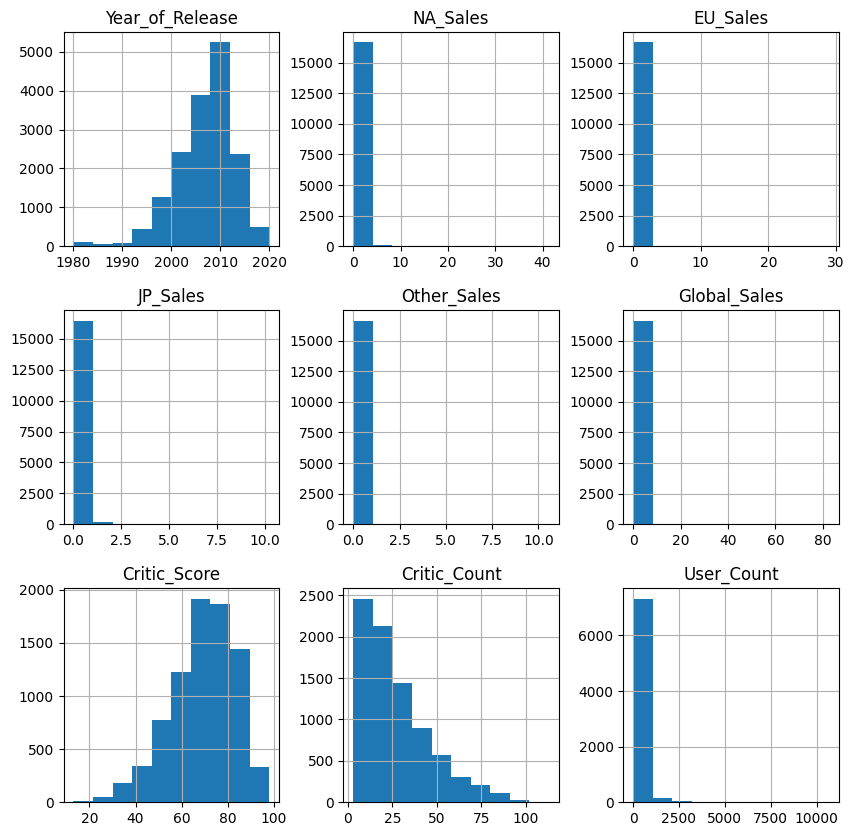

In [22]:
dataset.hist(figsize=(10,10))
plt.show()

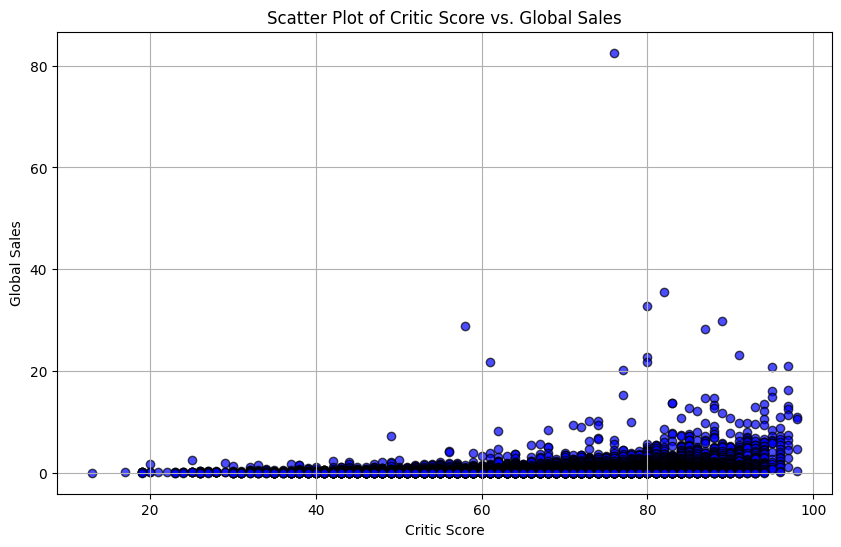

In [23]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Critic_Score'], dataset['Global_Sales'], color='blue', alpha=0.7, edgecolors='k')
plt.title('Scatter Plot of Critic Score vs. Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.grid(True)
plt.show()

In [24]:
dataset['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

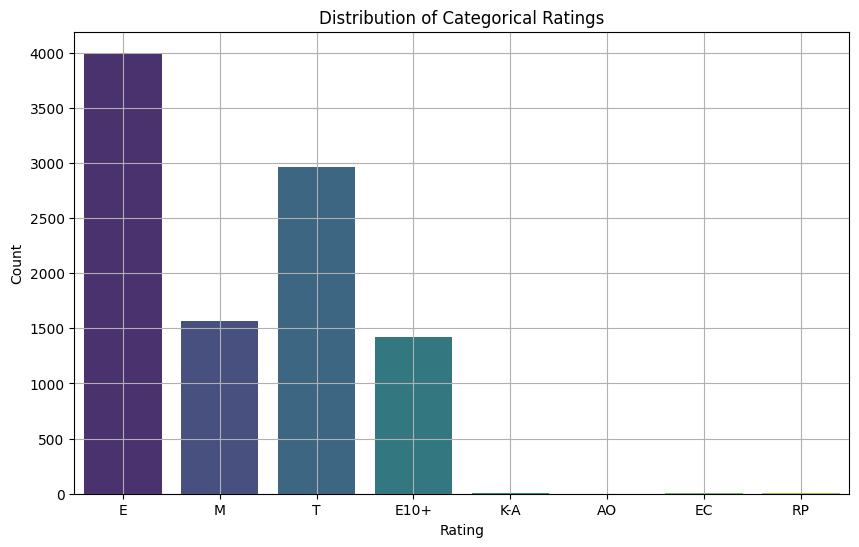

In [25]:
# Plot count plot of categorical ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=dataset, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Categorical Ratings')
plt.grid(True)
plt.show()

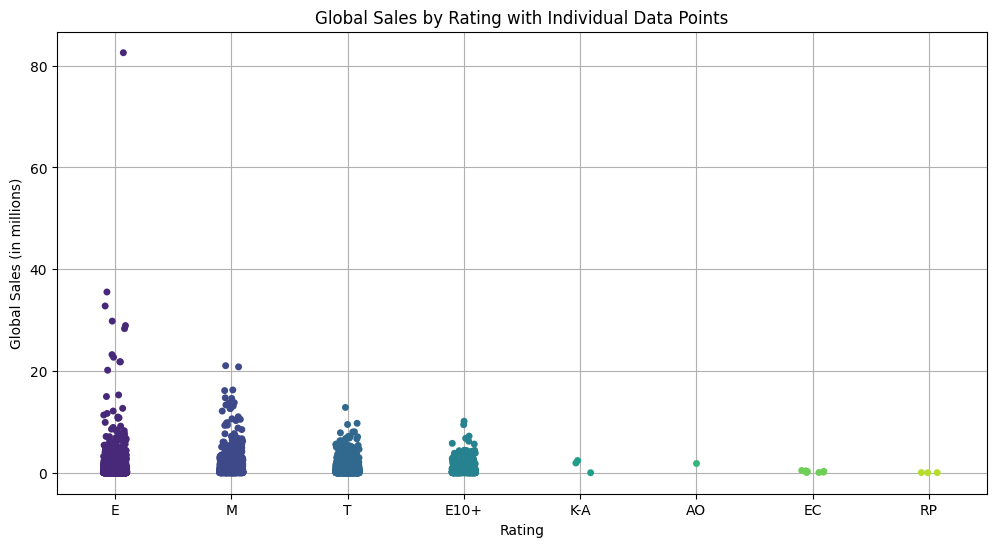

In [26]:
# Create a strip plot
plt.figure(figsize=(12, 6))
sns.stripplot(x='Rating', y='Global_Sales', data=dataset, jitter=True, palette='viridis')
plt.title('Global Sales by Rating with Individual Data Points')
plt.xlabel('Rating')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()

In [27]:
dataset.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [28]:
missing_percentage = dataset.isnull().mean() * 100
print(missing_percentage)

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64


In [29]:
data=dataset.drop(['Critic_Score','Critic_Count','User_Score','User_Count','Developer','Rating'],axis=1)

In [30]:
data.isnull().sum()

Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

In [31]:
data.dropna(subset=['Name'], inplace=True)

In [32]:
mode_year = data['Year_of_Release'].mode()[0]
data['Year_of_Release'].fillna(mode_year, inplace=True)

In [33]:
mode_publisher = dataset['Publisher'].mode()[0]
data['Publisher'].fillna(mode_publisher, inplace=True)

In [34]:
mode_genre = dataset['Genre'].mode()[0]
data['Genre'].fillna(mode_genre, inplace=True)

In [35]:
data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

In [36]:
data.shape

(16717, 10)

In [37]:
data['Year_of_Release']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16714    2016.0
16715    2006.0
16716    2016.0
16717    2003.0
16718    2016.0
Name: Year_of_Release, Length: 16717, dtype: float64

In [38]:
data['Year_of_Release']=data['Year_of_Release'].astype(int)

In [39]:
data['Year_of_Release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16714    2016
16715    2006
16716    2016
16717    2003
16718    2016
Name: Year_of_Release, Length: 16717, dtype: int64

In [40]:
data.duplicated().sum()

np.int64(0)

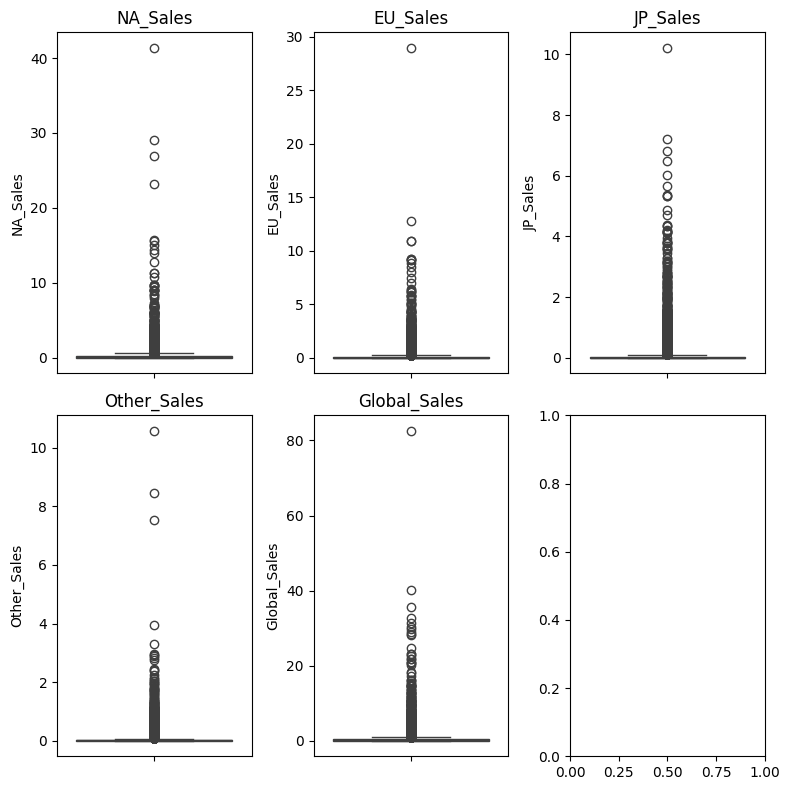

In [41]:
numerical_cols = data.select_dtypes(include=[ 'float64'])

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_cols):
    sns.boxplot(y=data[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [42]:
numerical_cols = data.select_dtypes(include=['float64']).columns

def iqr_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Apply outlier detection to numerical columns
outliers = data[numerical_cols].apply(iqr_outliers)

# Identify rows with outliers
outlier_rows = data[outliers.any(axis=1)]

# Count total outlier rows
total_outlier_rows = len(outlier_rows)

print("Total outlier rows:", total_outlier_rows)


Total outlier rows: 4759


In [43]:
#finding outliers using z score
from scipy import stats

df=data.copy()

numerical_cols = df.select_dtypes(include=['float64']).columns

# Calculate Z-scores for each numerical column
for col in numerical_cols:
    df[f'{col}_zscore'] = stats.zscore(df[col])

# Define threshold
threshold = 3

# Identify outliers based on Z-scores
outliers = data[(df[[col for col in df.columns if '_zscore' in col]] > threshold).any(axis=1)]

print("Outliers:")
print(outliers)


Outliers:
                                           Name Platform  Year_of_Release  \
0                                    Wii Sports      Wii             2006   
1                             Super Mario Bros.      NES             1985   
2                                Mario Kart Wii      Wii             2008   
3                             Wii Sports Resort      Wii             2009   
4                      Pokemon Red/Pokemon Blue       GB             1996   
...                                         ...      ...              ...   
1972                          Derby Stallion 96     SNES             1996   
1973                           Adventure Island      NES             1986   
2052  Oshare Majo Love and Berry: DS Collection       DS             2006   
2472                 Ben 10: Protector of Earth      PS2             2007   
2620                   Buzz! The Hollywood Quiz      PS2             2007   

             Genre                    Publisher  NA_Sales  EU_Sal

In [44]:
# Filter the DataFrame to remove outliers
filtered_df = df.copy()
for col in numerical_cols:
    filtered_df = filtered_df[(filtered_df[f'{col}_zscore'] < threshold) & (filtered_df[f'{col}_zscore'] > -threshold)]

# Drop the Z-score columns
filtered_df = filtered_df.drop(columns=[f'{col}_zscore' for col in numerical_cols])

# Display the original and filtered DataFrame
print("Original DataFrame:")
print(data)

print("\nFiltered DataFrame (without outliers):")
print(filtered_df)

Original DataFrame:
                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16715               LMA Manager 2007     X360             2006        Sports   
16716        Haitaka no Psychedelica      PSV             2016     Adventure   
16717               Spirits & Spells      GBA             2003      Platform   
16718            Winning Post 8 2016      PSV             2016    Simulation   

          Publisher

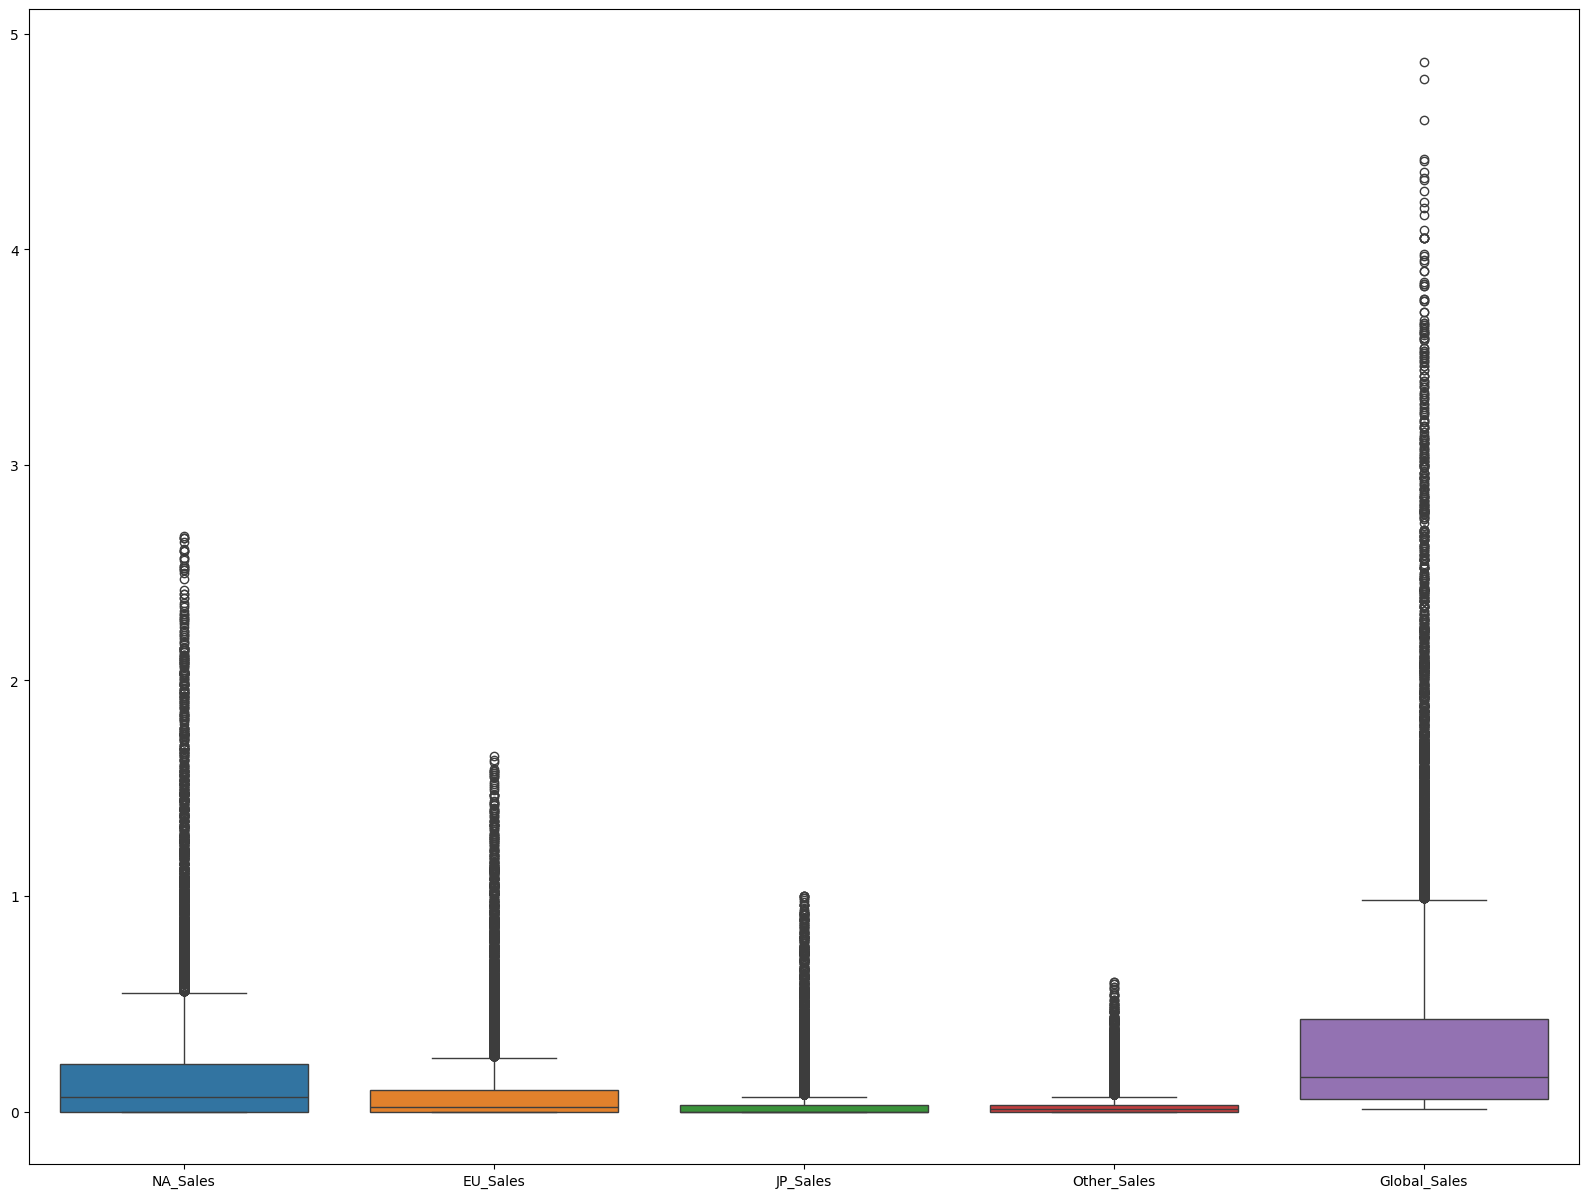

In [45]:
#boxplot after removing outliers
plt.figure(figsize=(20, 15))
sns.boxplot(data=filtered_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
plt.show()

In [46]:
#checking skewness after removing outliers
from scipy.stats import skew

# Calculate skewness
skewness = filtered_df[numerical_cols].apply(lambda x: skew(x.dropna()))
print("Skewness:\n", skewness)

# Identify features with skewness > 0.5 or < -0.5 (or any other threshold)
skewed_features = skewness[skewness.abs() > 0.5].index
print("Skewed Features:", skewed_features)

Skewness:
 NA_Sales        3.303685
EU_Sales        3.522304
JP_Sales        3.988553
Other_Sales     3.797805
Global_Sales    3.056220
dtype: float64
Skewed Features: Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], dtype='object')


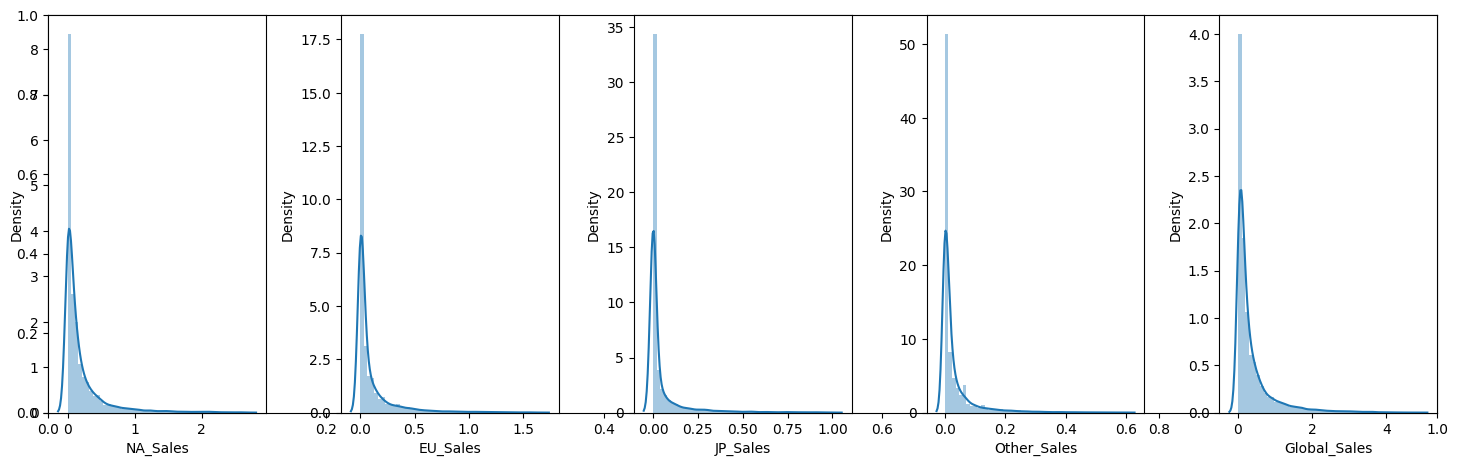

In [48]:
plt.subplots(figsize=(15, 5))
features = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']
for i, col in enumerate(features):
    plt.subplot(1, 5, i+1)
    sns.distplot(filtered_df[col])
plt.tight_layout()
plt.show()

In [49]:
#apply log transformation
data_log = filtered_df.copy()
data_log = data_log[data_log.NA_Sales != 0]
data_log = data_log[data_log.EU_Sales != 0]
data_log = data_log[data_log.Other_Sales != 0]
data_log = data_log[data_log.JP_Sales != 0]
data_log = data_log[data_log.Global_Sales != 0]

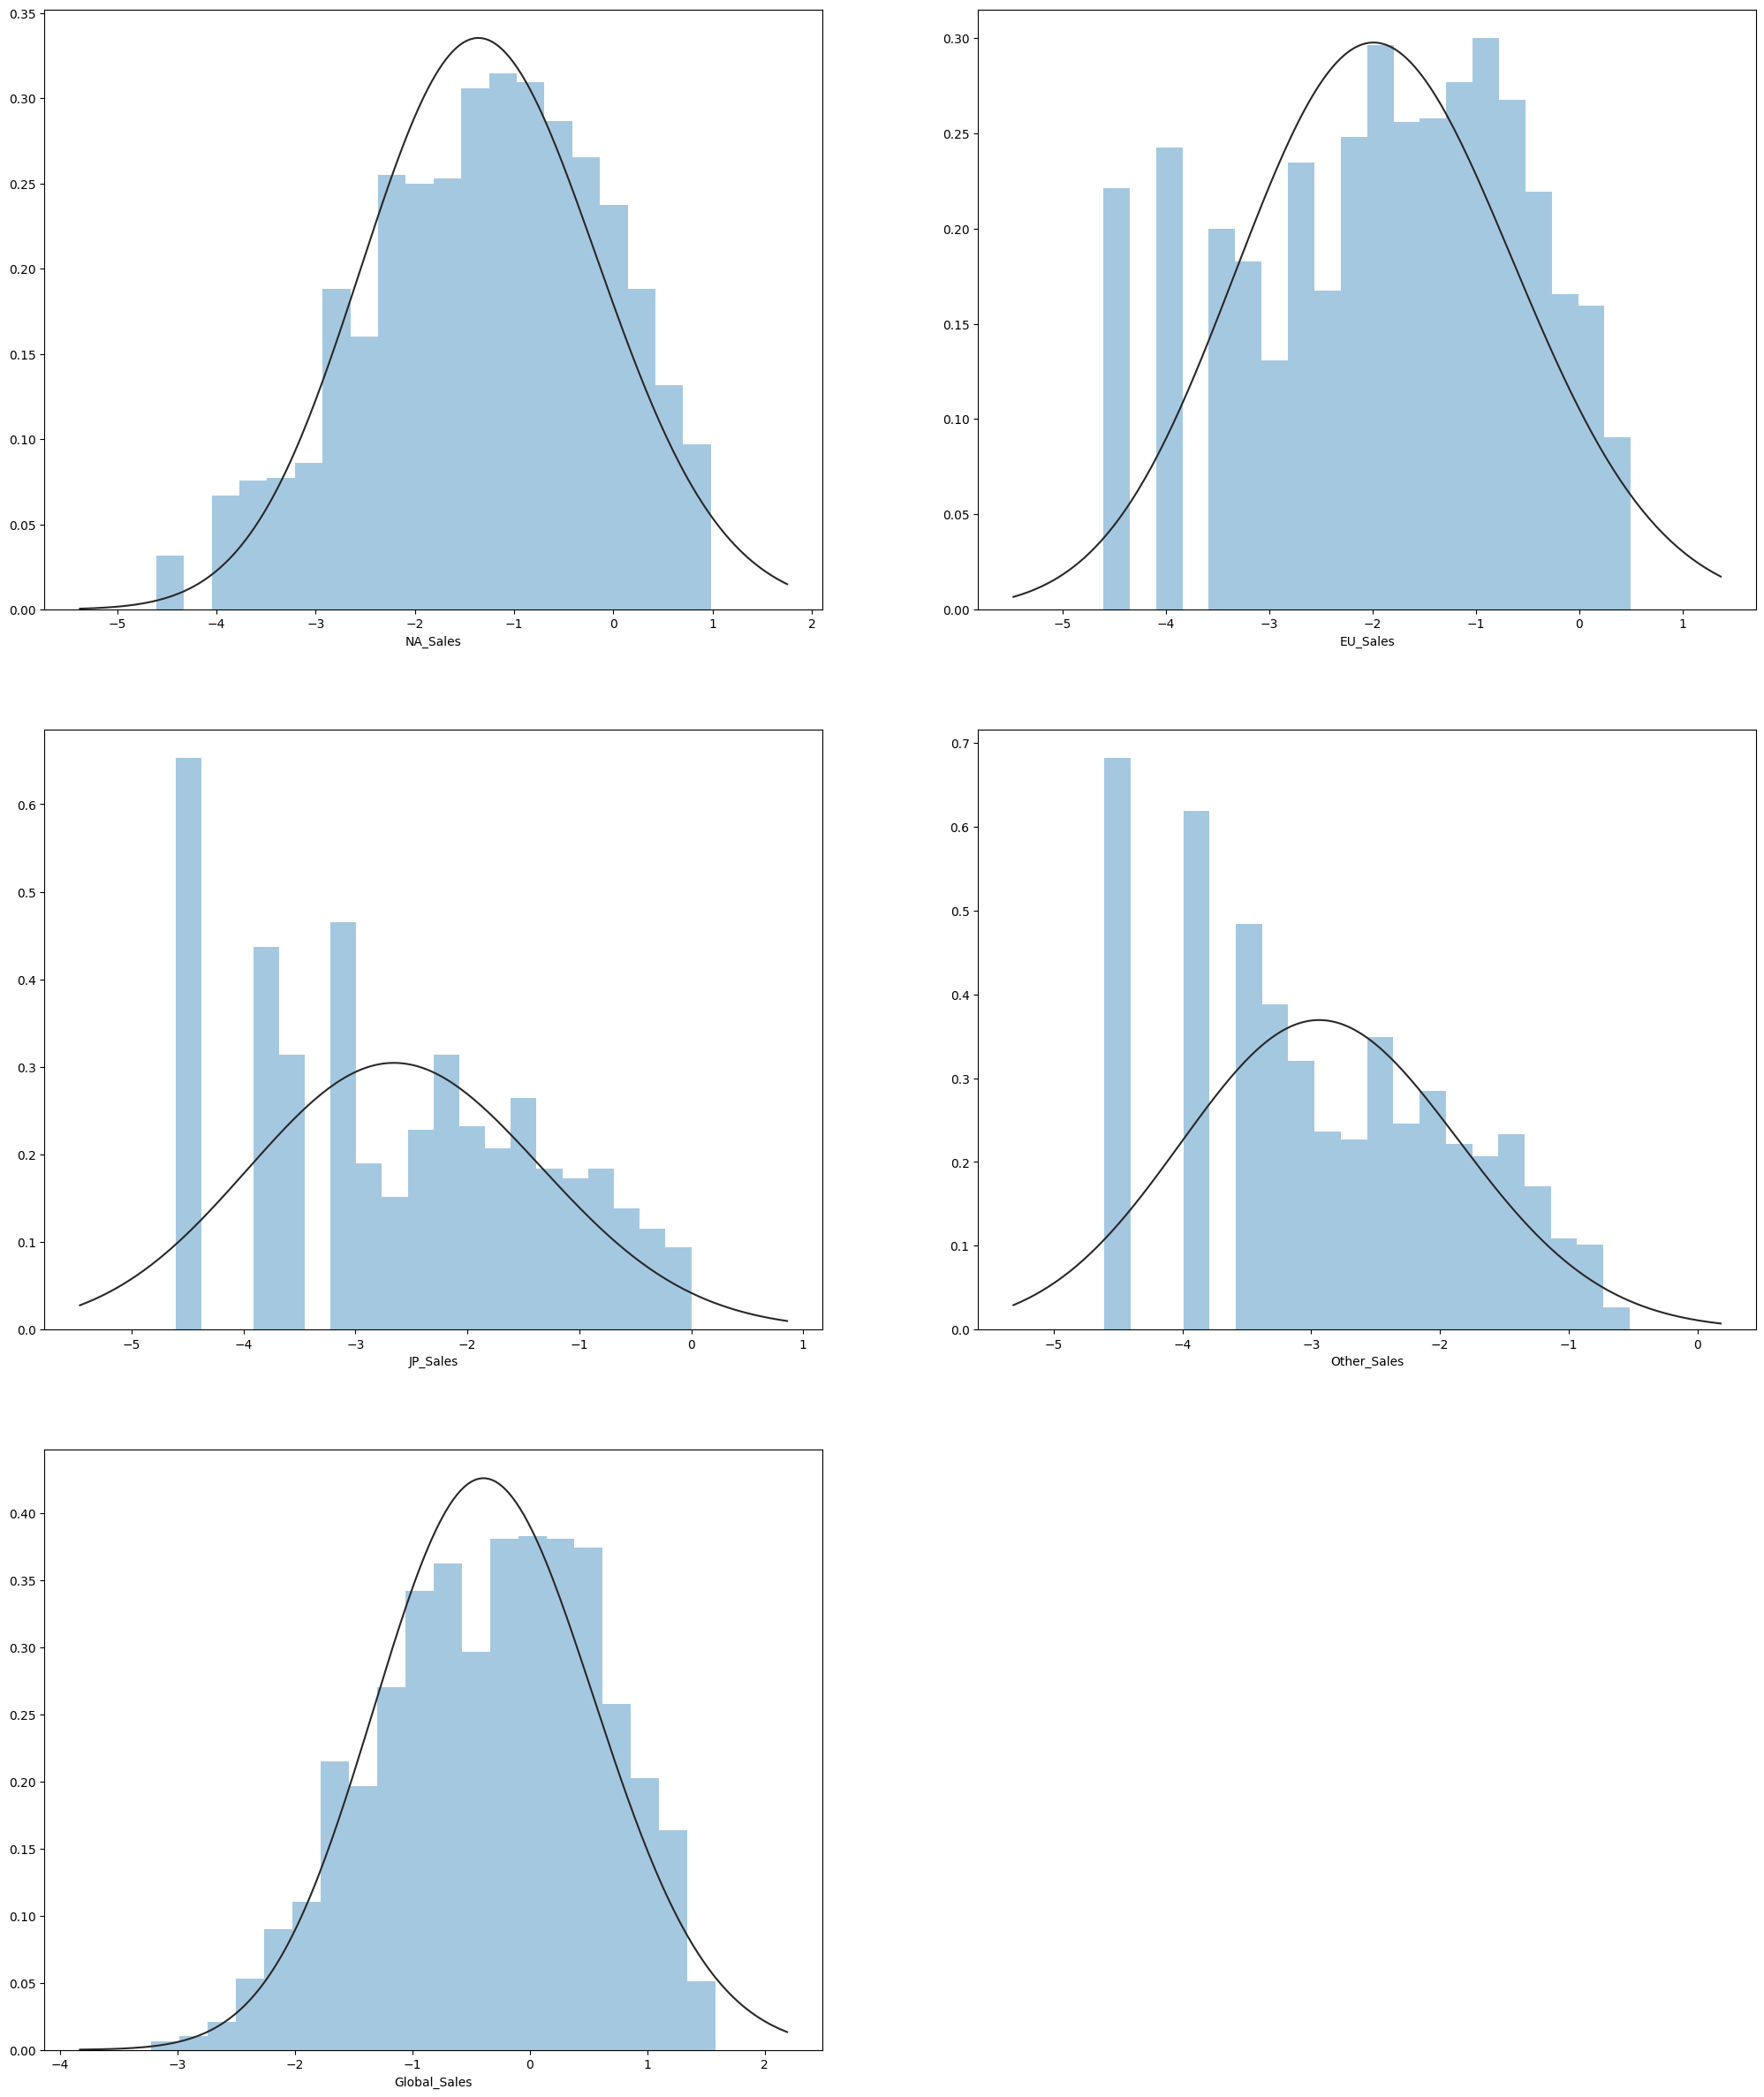

In [50]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_log[column]), bins=20, kde=False, fit=stats.gamma)

EDA

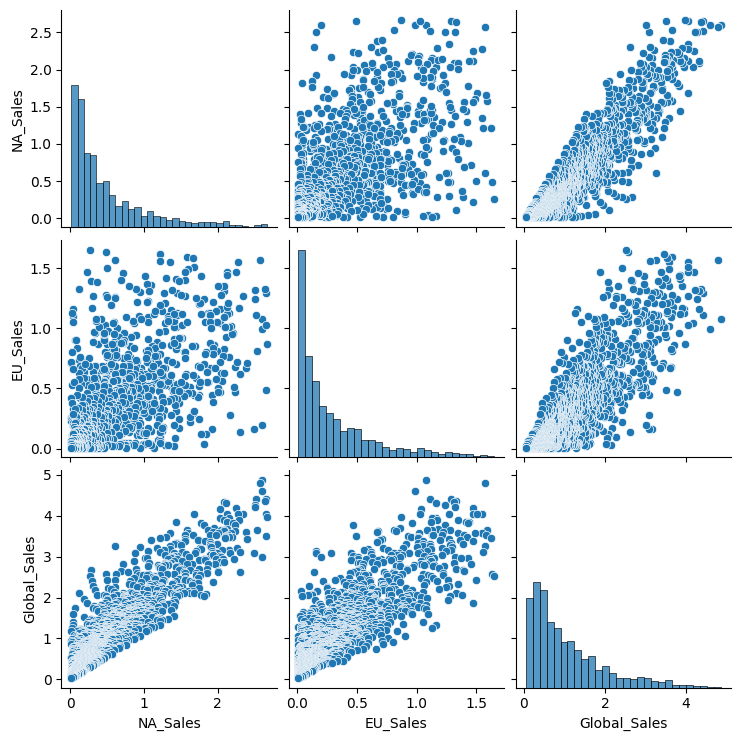

In [51]:
sns.pairplot(data_log[[ "NA_Sales","EU_Sales","Global_Sales"]])
plt.show()

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_log['Name'] = le.fit_transform(data_log['Name'])
data_log['Platform'] = le.fit_transform(data_log['Platform'])
data_log['Genre'] = le.fit_transform(data_log['Genre'])
data_log['Publisher'] = le.fit_transform(data_log['Publisher'])

In [53]:
from sklearn.model_selection import train_test_split
# Define features and target
X = data_log.drop('Global_Sales', axis=1)
y = data_log['Global_Sales']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
corr_matrix = data_log.corr()
print(corr_matrix)

                     Name  Platform  Year_of_Release     Genre  Publisher  \
Name             1.000000 -0.028153        -0.018927 -0.033912   0.077004   
Platform        -0.028153  1.000000         0.242616 -0.012021  -0.039834   
Year_of_Release -0.018927  0.242616         1.000000 -0.085186   0.051439   
Genre           -0.033912 -0.012021        -0.085186  1.000000  -0.040297   
Publisher        0.077004 -0.039834         0.051439 -0.040297   1.000000   
NA_Sales         0.059872  0.043210        -0.190583 -0.007348  -0.027868   
EU_Sales         0.049314  0.069776         0.014030 -0.005647  -0.065291   
JP_Sales         0.049761 -0.299646        -0.392562  0.026203   0.075472   
Other_Sales      0.015123  0.120980         0.149505  0.021030  -0.061763   
Global_Sales     0.066185 -0.001383        -0.175656  0.001662  -0.030787   

                 NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
Name             0.059872  0.049314  0.049761     0.015123      0.066185  
Pl

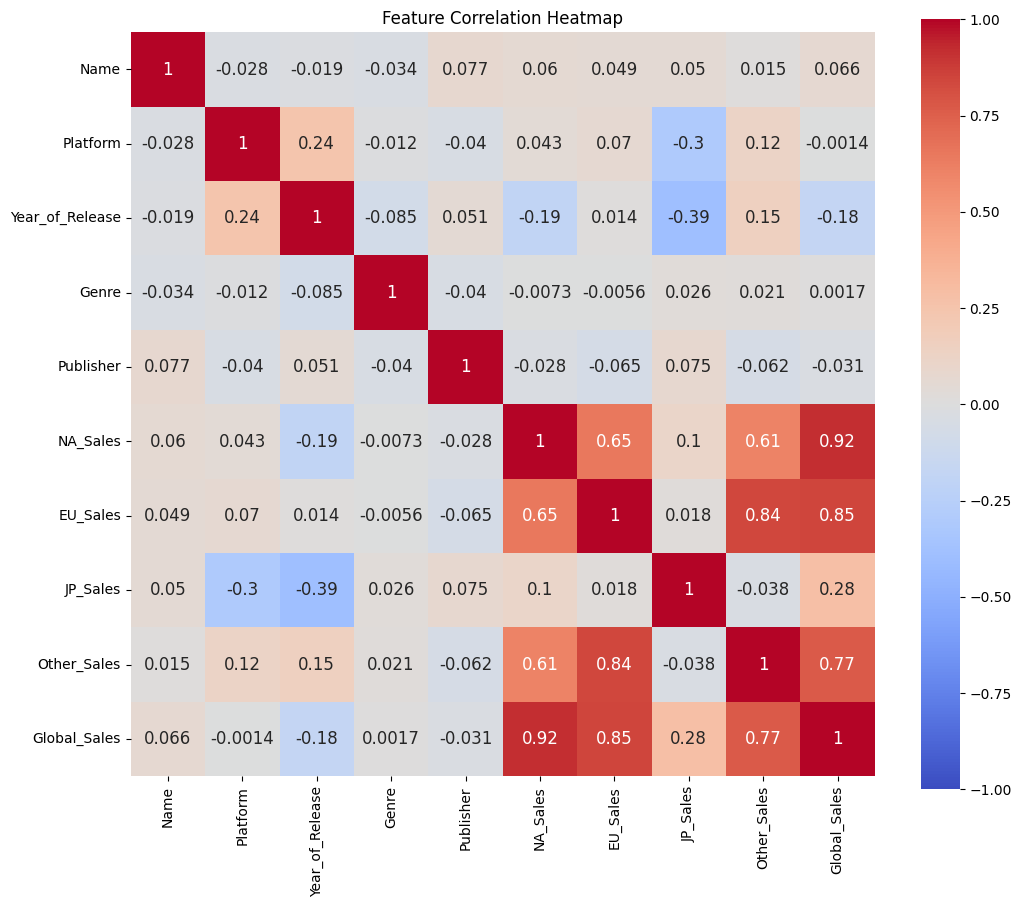

In [52]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, annot_kws={'size': 12}, vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

In [58]:
from sklearn.feature_selection import SelectKBest, f_regression
#Select top K features
# Define the number of top features to select
k = 5  # For example, select the top 10 features

# Initialize SelectKBest again with the desired number of features
selector = SelectKBest(score_func=f_regression, k=5)
X_train_k = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print(f'Top {k} features: {selected_features}')
     

Top 5 features: Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')


In [59]:
#simple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
r2 = r2_score(y_test, y_pred1)
print("R-squared for linear regression model:", r2)
mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error for linear regression model:", mse)
mae = mean_absolute_error(y_test, y_pred1)
print("Mean Absolute Error for linear regression model:", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print("Root Mean Squared Error for linear regression model:", rmse)

R-squared for linear regression model: 0.9999490936563904
Mean Squared Error for linear regression model: 3.971494723866521e-05
Mean Absolute Error for linear regression model: 0.0041619328973389125
Root Mean Squared Error for linear regression model: 0.006301979628550477


In [60]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred2 = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred2)
print("R-squared for Random Forest Regression model:", r2)
mse = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error for Random Forest Regression model:", mse)
mae = mean_absolute_error(y_test, y_pred2)
print("Mean Absolute Error for Random Forest Regression model:", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
print("Root Mean Squared Error for Random Forest Regression model:", rmse)

R-squared for Random Forest Regression model: 0.9898721379230396
Mean Squared Error for Random Forest Regression model: 0.007901323872549012
Mean Absolute Error for Random Forest Regression model: 0.049954411764705844
Root Mean Squared Error for Random Forest Regression model: 0.08888939122611321


In [66]:
#checking if the model is overfitting

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred2 = rf_model.predict(X_train)
r2 = r2_score(y_train, y_pred2)
print("R-squared for Random Forest Regression model:", r2)
mse = mean_squared_error(y_train, y_pred2)
print("Mean Squared Error for Random Forest Regression model:", mse)
mae = mean_absolute_error(y_train, y_pred2)
print("Mean Absolute Error for Random Forest Regression model:", mae)
rmse = np.sqrt(mean_squared_error(y_train, y_pred2))
print("Root Mean Squared Error for Random Forest Regression model:", rmse)

R-squared for Random Forest Regression model: 0.998658411213437
Mean Squared Error for Random Forest Regression model: 0.0011107253931203862
Mean Absolute Error for Random Forest Regression model: 0.018279115479115458
Root Mean Squared Error for Random Forest Regression model: 0.03332754706125829


In [67]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred3 = gb_model.predict(X_test)
r2 = r2_score(y_test, y_pred3)
print("R-squared for Gradient Boosting Regression:", r2)
mse = mean_squared_error(y_test, y_pred3)
print("Mean Squared Error for Gradient Boosting Regression model:", mse)
mae = mean_absolute_error(y_test, y_pred3)
print("Mean Absolute Error for Gradient Boosting Regression model:", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
print("Root Mean Squared Error for Gradient Boosting Regression model:", rmse)

R-squared for Gradient Boosting Regression: 0.996621080924203
Mean Squared Error for Gradient Boosting Regression model: 0.002636087829211311
Mean Absolute Error for Gradient Boosting Regression model: 0.0353881306973884
Root Mean Squared Error for Gradient Boosting Regression model: 0.051342845939929264


In [68]:
#checking if the model is overfitting

# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred7=gb_model.predict(X_train)
r2 = r2_score(y_train, y_pred7)
print("R-squared for Gradient Boosting Regression:", r2)
mse = mean_squared_error(y_train, y_pred7)
print("Mean Squared Error for Gradient Boosting Regression model:", mse)
mae = mean_absolute_error(y_train, y_pred7)
print("Mean Absolute Error for Gradient Boosting Regression model:", mae)
rmse = np.sqrt(mean_squared_error(y_train, y_pred7))
print("Root Mean Squared Error for Gradient Boosting Regression model:", rmse)


R-squared for Gradient Boosting Regression: 0.9980857854382205
Mean Squared Error for Gradient Boosting Regression model: 0.001584812531935562
Mean Absolute Error for Gradient Boosting Regression model: 0.028974183746332195
Root Mean Squared Error for Gradient Boosting Regression model: 0.03980970399206156


In [69]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred5 = svr_model.predict(X_test)
r2 = r2_score(y_test, y_pred5)
print("R-squared for Support Vector Regression:", r2)
mse = mean_squared_error(y_test, y_pred5)
print("Mean Squared Error for Support Vector Regression model:", mse)
mae = mean_absolute_error(y_test, y_pred5)
print("Mean Absolute Error for Support Vector Regression model:", mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred5))
print("Root Mean Squared Error for Support Vector Regression model:", rmse)

R-squared for Support Vector Regression: -0.08073058708644076
Mean Squared Error for Support Vector Regression model: 0.8431396796926806
Mean Absolute Error for Support Vector Regression model: 0.6749673590529306
Root Mean Squared Error for Support Vector Regression model: 0.9182263771492739


In [70]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred6 = ada_model.predict(X_test)
r2 = r2_score(y_test, y_pred6)
print("R-squared for AdaBoost Regression:", r2)
mse = mean_squared_error(y_test, y_pred6)
print("Mean Squared Error for AdaBoost Regression model:", mse)
mae = mean_absolute_error(y_test, y_pred6)
print("Mean Absolute Error for AdaBoost Regression model:", mae)
rmse= np.sqrt(mean_squared_error(y_test, y_pred6))
print("Root Mean Squared Error for AdaBoost Regression model:", rmse)

R-squared for AdaBoost Regression: 0.9128744277579366
Mean Squared Error for AdaBoost Regression model: 0.06797163691947897
Mean Absolute Error for AdaBoost Regression model: 0.2350038313948048
Root Mean Squared Error for AdaBoost Regression model: 0.2607137068116653


HYPERPARAMETER TUNING

In [71]:
from sklearn.model_selection import  GridSearchCV

# Define models and parameter grids
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200], 'max_depth': [5, 10]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]}
    },
    'Support Vector Regression': {
        'model': SVR(),
        'params': {'kernel': ['rbf']}
    },
    
    'AdaBoost Regression': {
        'model': AdaBoostRegressor(),
        'params': {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.01]}
    }
}



In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

for model_name, config in models.items():
    model = config['model']
    params = config['params']

    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluate the best model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Mean Squared Error (mse): {mse:.3f}")
    print(f"Mean Absolute Error (mae): {mae:.3f}") 
    print(f"R-squared (R2): {r2:.3f}") 
    print(f"Root Mean Squared Error(rmse): {np.sqrt(mse):.3f}")
    print("-----")

Model: Linear Regression
Best parameters: {}
Mean Squared Error (mse): 0.000
Mean Absolute Error (mae): 0.004
R-squared (R2): 1.000
Root Mean Squared Error(rmse): 0.006
-----
Model: Random Forest
Best parameters: {'max_depth': 10, 'n_estimators': 200}
Mean Squared Error (mse): 0.008
Mean Absolute Error (mae): 0.052
R-squared (R2): 0.989
Root Mean Squared Error(rmse): 0.091
-----
Model: Gradient Boosting
Best parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Mean Squared Error (mse): 0.002
Mean Absolute Error (mae): 0.030
R-squared (R2): 0.998
Root Mean Squared Error(rmse): 0.043
-----
Model: Support Vector Regression
Best parameters: {'kernel': 'rbf'}
Mean Squared Error (mse): 0.843
Mean Absolute Error (mae): 0.675
R-squared (R2): -0.081
Root Mean Squared Error(rmse): 0.918
-----
Model: AdaBoost Regression
Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Mean Squared Error (mse): 0.050
Mean Absolute Error (mae): 0.170
R-squared (R2): 0.936
Root Mean Squared Error(rmse

In [73]:
data_log.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
216,1376,19,2014,2,63,2.60,1.08,0.81,0.38,4.87
221,241,9,1999,6,76,2.57,1.57,0.44,0.21,4.79
233,1470,5,2002,0,63,2.60,0.99,0.89,0.13,4.60
248,984,19,2012,3,63,2.52,1.11,0.46,0.33,4.42
249,1526,10,2001,10,5,2.66,1.29,0.01,0.46,4.41


In [74]:
import joblib
joblib.dump(gb_model,'gb_model.pkl')

# To load the model later
loaded_model = joblib.load('gb_model.pkl')

In [75]:
test_unseen = {
    'Name': ['Wii Sports'],
    'Platform': ['Wii'],
    'Year_of_Release': [2006],
    'Genre': ['Sports'],
    'Publisher': ['Nintendo'],
    'NA_Sales': [3 ],
    'EU_Sales': [1],
    'JP_Sales': [0.9],
    'Other_Sales': [0.5],
    



}

# Convert the dictionary to a Pandas DataFrame
test_unseen_df = pd.DataFrame(test_unseen)

# Display the data types of each column
print(test_unseen_df.dtypes)

Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales             int64
EU_Sales             int64
JP_Sales           float64
Other_Sales        float64
dtype: object


In [76]:
test_unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1 non-null      object 
 1   Platform         1 non-null      object 
 2   Year_of_Release  1 non-null      int64  
 3   Genre            1 non-null      object 
 4   Publisher        1 non-null      object 
 5   NA_Sales         1 non-null      int64  
 6   EU_Sales         1 non-null      int64  
 7   JP_Sales         1 non-null      float64
 8   Other_Sales      1 non-null      float64
dtypes: float64(2), int64(3), object(4)
memory usage: 204.0+ bytes


In [77]:
custom_mappings = {
    'Name': {'Wii Sports': '1459'},
    'Platform': {'Wii': '6'},
    'Genre': {'Sports': '10'},
    'Publisher': {'Nintendo': '70'},

}

# Apply the mappings using .replace() for each categorical column
for col, mapping in custom_mappings.items():
    test_unseen_df[col] = test_unseen_df[col].replace(mapping)  # Use 'test_unseen_df'

# Display the modified DataFrame
test_unseen_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1459,6,2006,10,70,3,1,0.9,0.5


In [78]:
# Get missing columns from the training data
missing_cols = set(gb_model.feature_names_in_).difference(test_unseen_df.columns)

# Add missing columns to test_unseen_df and fill with zeros
for col in missing_cols:
    test_unseen_df[col] = 0

# Ensure the order of columns matches the training data
test_unseen_df = test_unseen_df[gb_model.feature_names_in_]

# Now try predicting again
y_pred = gb_model.predict(test_unseen_df)
print(y_pred)

[4.80716821]
